# Forest Fire Burn Area Prediction - CS345 Final Project

### - Kyle Cummings & Mike Peyton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("fires.csv", sep = ",") #Read In Values

Y = np.array(data[['area']].values)
X = data[data.columns[:-1]]

### Feature Correlation Values:

In [3]:
dataCorr = np.array(data.corr()[['area']].values) #Get Area Correlation Values 
featureCorr = dataCorr[:,0][:-1] #Remove Area to Area Correlation (Always 1)
features = ['X','Y','month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

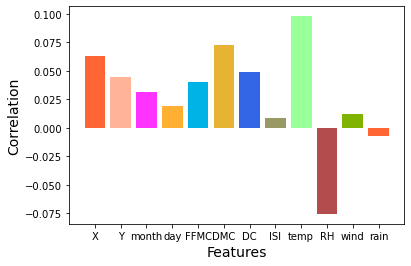

In [4]:
plt.bar(features, featureCorr, color = ['#FF6633', '#FFB399', '#FF33FF', '#FFAF32', '#00B3E6',  '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D','#80B300'])
plt.ylabel('Correlation', size = 14)
plt.xlabel('Features', size = 14)
plt.show()

**- <em>After analyzing the the corelation between total burn area and features we see that temp gives us the best correlation (0.09784). This values is considered a very low corealtion in general but is the best correlation of all features.</em>**

### Mean corealtion before and after feature removal: 

In [5]:
#Remove Features With Lowest Correlation Coefficient 
featureCorr = np.abs(featureCorr)
coef_improved = np.array(featureCorr)
coef_improved = np.delete(featureCorr,11)
coef_improved = np.delete(featureCorr,10)
coef_improved = np.delete(featureCorr,7)
coef_improved = np.delete(featureCorr,3)

In [6]:
print('Mean Correlation w/o removal:', np.mean(featureCorr))
print('Mean Correlation w/ removal:',np.mean(coef_improved))

Mean Correlation w/o removal: 0.04350259434725592
Mean Correlation w/ removal: 0.04573775696608793


**- <em>We removed the features rain, wind, and ISI because they were amongst the lowest corealtion values of all features significantly. After computing the mean correlation values before and after removing insignificant features we see an increase in overall correlation. 0.04350 Before and .045738 after removal.</em>**

### Testing linear regression:

##### Performing cross validation to get optimal hyperparameters:

In [7]:
from sklearn.model_selection import GridSearchCV

linreg = LinearRegression()

param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

classifier = GridSearchCV(linreg, param_grid)

classifier.fit(X, Y);

In [8]:
classifier.best_params_

{'fit_intercept': False, 'normalize': True}

##### Removing where area = 0:

In [9]:
data_clean = []
for row in data.values:
    if(row[-1] != 0):
        data_clean.append(row)

data_clean = np.array(data_clean)

X_clean = data_clean[:,:12]
y_clean = data_clean[:,12]

##### Fitting with degree 1 on the original dataset:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=.3, random_state = 2)

linreg = LinearRegression(fit_intercept=False, normalize=True)
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [11]:
np.mean(np.abs(y_pred-y_test)) #Error calculation

28.161155996889725

**Originally we thought that removing zeros would decrease overall but we can see that removing the zeroes was actual quite detrimental to the accuracy of the regression. We will leave this out.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state = 2)
linreg = LinearRegression(fit_intercept=False, normalize=True)
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [13]:
np.mean(np.abs(y_pred-y_test)) #Error calculation

19.263999962907985

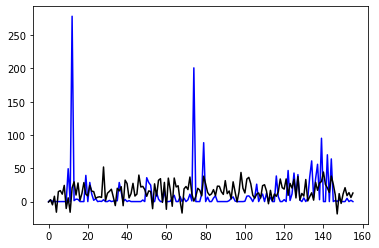

In [14]:
plt.plot(y_test, color='blue')
plt.plot(y_pred, color='black')

**Fitting the regression with degree 1 on the improved dataset**

In [15]:
new_X = np.array(X)
new_X = np.delete(new_X, 11, 1)
new_X = np.delete(new_X, 10, 1)
new_X = np.delete(new_X, 7, 1)
new_X = np.delete(new_X, 3, 1)

X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=.3, random_state=2)

linreg = LinearRegression(fit_intercept=False, normalize=True)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [16]:
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

18.106610812591672


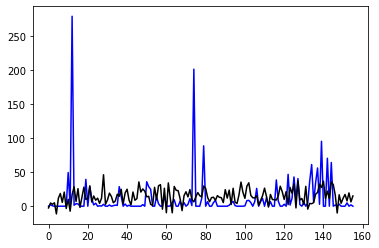

In [17]:
plt.plot(y_test, color='blue')
plt.plot(y_pred, color='black')

### Elastic Net Regression:

In [18]:
regr = ElasticNet()

param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False],
              'alpha': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]}

classifier = GridSearchCV(regr, param_grid)

classifier.fit(X, Y);

In [19]:
classifier.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': True}

In [20]:
regr = ElasticNet(fit_intercept = True, normalize=True, alpha=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state = 2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [21]:
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

16.890496484125293


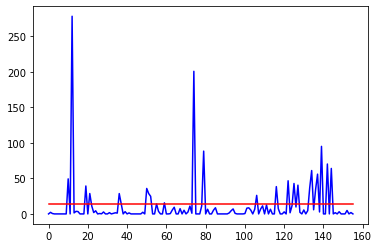

In [22]:
plt.plot(y_test, color='blue')
plt.plot(y_pred, color='red')

**Although these results gave us a lower error, we can clearly see from the graph that underfitting is taking place**

In [23]:
classifier.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': True}

**Although highly skeptical, we will now try with Polynomial Regression, of degree 2, since all other degrees cause massive overfitting for this particular dataset.**

In [24]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

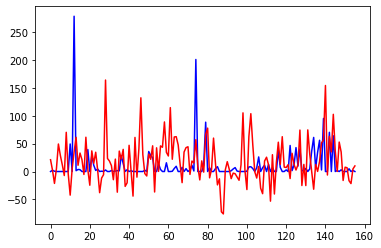

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=2)
model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.plot(y_test, color='blue')
plt.plot(y_pred, color='red')

**Since our results using the previous three classifiers was mediocre, we have decided that random forest regression might be more appropriate for this proble.**

**Random Forest Regression**

In [26]:
from sklearn.ensemble import RandomForestRegressor

Y = Y.transpose()[0]
regressor = RandomForestRegressor()

param_grid = {'n_estimators': [10,12,15,17,20,25,50],
              'max_depth': [2,3,5,10, None]}

classifier = GridSearchCV(regressor, param_grid)

classifier.fit(X, Y);

In [27]:
classifier.best_params_

{'max_depth': 2, 'n_estimators': 25}

In [101]:
regressor = RandomForestRegressor(n_estimators=25, max_depth=2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [102]:
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

15.2168587784288


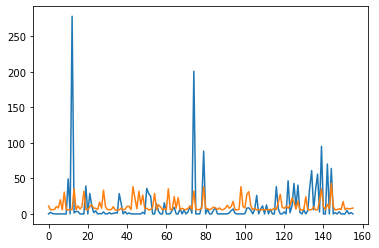

In [103]:
plt.plot(y_test)
plt.plot(y_pred)